In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
data=pd.read_csv("/content/laptop_price(3rd) (6).csv")

In [14]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,0,1,1,13.3,0,1,1,5,8,128,1,1,1,1.37,1,1339.69
1,1,1,1,13.3,0,0,1,5,8,128,2,1,2,1.34,1,898.94
2,2,2,2,15.6,0,0,1,5,8,256,1,1,3,1.86,2,575.00
3,3,1,1,15.4,0,1,1,7,16,512,1,2,4,1.83,1,2537.45
4,4,1,1,13.3,0,1,1,5,8,256,1,1,5,1.37,1,1803.60


In [15]:
data.isnull().sum()

Unnamed: 0      0
Company         0
TypeName        0
Inches          0
Touchscreen     0
Ips             0
Cpu_Vender      0
Cpu_Type        0
Ram             0
Storage (GB)    0
Storage Type    0
Gpu_Vender      0
Gpu_Type        0
Weight          0
OpSys           0
Price_euros     0
dtype: int64

In [16]:
data.info()

x=data.drop(['Price_euros'] ,axis=1)
y=data['Price_euros']

print(x)

print(y)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1303 non-null   int64  
 1   Company       1303 non-null   int64  
 2   TypeName      1303 non-null   int64  
 3   Inches        1303 non-null   float64
 4   Touchscreen   1303 non-null   int64  
 5   Ips           1303 non-null   int64  
 6   Cpu_Vender    1303 non-null   int64  
 7   Cpu_Type      1303 non-null   int64  
 8   Ram           1303 non-null   int64  
 9   Storage (GB)  1303 non-null   int64  
 10  Storage Type  1303 non-null   int64  
 11  Gpu_Vender    1303 non-null   int64  
 12  Gpu_Type      1303 non-null   int64  
 13  Weight        1303 non-null   float64
 14  OpSys         1303 non-null   int64  
 15  Price_euros   1303 non-null   float64
dtypes: float64(3), int64(13)
memory usage: 163.0 KB
      Unnamed: 0  Company  TypeName  Inches  Touchscreen  Ips  Cpu

linear regression: 0.6091514614735472
lasso regression: 0.5792820785249995
Ridge regression: 0.6040584769758162


<function matplotlib.pyplot.show(*args, **kw)>

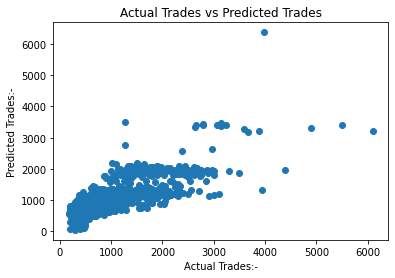

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=True)

lin_reg_model=LinearRegression()

reg=lin_reg_model.fit(x_train,y_train)

reg.score(x_test,y_test)

reg.score(x_train,y_train)

train_prediction=lin_reg_model.predict(x_train)

error_score=metrics.r2_score(y_train,train_prediction)
print('linear regression:',error_score)

plt.scatter(y_train,train_prediction)


from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)
train_prediction1=lasso_reg.predict(x_train)

error_score1=metrics.r2_score(y_train,train_prediction1)
print('lasso regression:',error_score1)
lasso_reg.score(x_test,y_test)
lasso_reg.score(x_train,y_train)


from sklearn.linear_model import Ridge
Ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
Ridge_reg.fit(x_train,y_train)
train_prediction2=Ridge_reg.predict(x_train)

error_score2=metrics.r2_score(y_train,train_prediction2)

print('Ridge regression:',error_score2)

kk=Ridge_reg.score(x_train,y_train)

ll=Ridge_reg.score(x_test,y_test)
plt.xlabel("Actual Trades:-")
plt.ylabel("Predicted Trades:-")
plt.title("Actual Trades vs Predicted Trades")
plt.show